In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from skopt.plots import plot_convergence
from skopt import forest_minimize
import Model_Evaluation as me

In [5]:
data = pd.read_csv('pack_ext_fs_47.csv')
data

,Year_Month,Sum of Sales,BUILD FOR_Total_Trailer,"Class 4, North America_Inventories (Ward's)_indicators_m_trucking_trailer",G325_indicators_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking",Change in Payroll Employment (000's)_driver_indicators_m_trucking,"Total Classes 4-7, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",FTR Truck Loadings_Y/Y % Change_freight_m_trucking_trailer,...,Change in Truck Emp. (000's)_driver_indicators_m_trucking,BUILD FOR_All_Other,PORTEU_indicators_m_trucking,BUILD FOR_All_Other.1,Change in Truck Emp. (000's)_driver_indicators_m_trucking.1,"Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_Y/Y % Change_indicators_m_trucking_trailer","Class 4, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer.1",Canada Origin Intermodal Volumes_Domestic_x
0,2008-01,381696.51,10291.0,18764.0,116.8145,88.294650,11.0,14.674525,-3.727683,-5.114613,...,-2.0,969.0,1.589857e+06,969.0,-2.0,-27.608874,-34.572797,2261.0,-27.608874,46969.0
1,2008-02,430305.85,11750.0,18603.0,115.6614,87.998407,-79.0,-18.664736,-4.198226,-4.132064,...,-4.0,1104.0,1.582820e+06,1104.0,-4.0,-8.198726,-40.691569,2824.0,-8.198726,44924.0
2,2008-03,451627.81,12333.0,16986.0,114.5234,87.790155,-49.0,18.702970,-5.142497,-6.990265,...,2.0,1158.0,1.521727e+06,1158.0,2.0,-32.989621,-42.219161,1764.0,-32.989621,46727.0
3,2008-04,467417.48,11583.0,17294.0,113.1064,89.639867,-240.0,-19.327365,-0.275367,-2.546753,...,-2.0,931.0,1.606410e+06,931.0,-2.0,-35.458469,-42.061705,1858.0,-35.458469,53497.0
4,2008-05,462676.37,12336.0,17632.0,112.0097,89.134818,-177.0,5.938456,3.671014,-5.080068,...,-6.0,991.0,1.656703e+06,991.0,-6.0,-23.315019,-41.314554,2595.0,-23.315019,53653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-07,456579.51,15083.0,10265.0,95.6420,89.962431,1761.0,-13.073806,-16.432942,-13.644998,...,3.0,1359.0,2.034822e+06,1359.0,3.0,-82.635645,-56.006716,1055.0,-82.635645,57503.0
151,2020-08,318564.72,16134.0,8975.0,96.8567,90.641835,1493.0,-2.832193,-9.182134,-10.970670,...,10.0,1671.0,2.234365e+06,1671.0,10.0,-65.888001,-49.958769,1111.0,-65.888001,56478.0
152,2020-09,980476.36,18288.0,9413.0,96.4458,90.587889,711.0,21.757348,3.572362,-6.599121,...,4.0,1711.0,2.097868e+06,1711.0,4.0,-19.678565,-41.280187,2316.0,-19.678565,59269.0
153,2020-10,922901.36,19991.0,10338.0,97.7867,94.367218,610.0,1.950027,1.306495,-3.721000,...,8.0,2018.0,2.242668e+06,2018.0,8.0,-8.533274,-45.676211,2508.0,-8.533274,60708.0


In [6]:
data = data.dropna(axis = 1)
data

,Year_Month,Sum of Sales,BUILD FOR_Total_Trailer,"Class 4, North America_Inventories (Ward's)_indicators_m_trucking_trailer",G325_indicators_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking",Change in Payroll Employment (000's)_driver_indicators_m_trucking,"Total Classes 4-7, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",FTR Truck Loadings_Y/Y % Change_freight_m_trucking_trailer,...,Change in Truck Emp. (000's)_driver_indicators_m_trucking,BUILD FOR_All_Other,PORTEU_indicators_m_trucking,BUILD FOR_All_Other.1,Change in Truck Emp. (000's)_driver_indicators_m_trucking.1,"Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_Y/Y % Change_indicators_m_trucking_trailer","Class 4, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer.1",Canada Origin Intermodal Volumes_Domestic_x
0,2008-01,381696.51,10291.0,18764.0,116.8145,88.294650,11.0,14.674525,-3.727683,-5.114613,...,-2.0,969.0,1.589857e+06,969.0,-2.0,-27.608874,-34.572797,2261.0,-27.608874,46969.0
1,2008-02,430305.85,11750.0,18603.0,115.6614,87.998407,-79.0,-18.664736,-4.198226,-4.132064,...,-4.0,1104.0,1.582820e+06,1104.0,-4.0,-8.198726,-40.691569,2824.0,-8.198726,44924.0
2,2008-03,451627.81,12333.0,16986.0,114.5234,87.790155,-49.0,18.702970,-5.142497,-6.990265,...,2.0,1158.0,1.521727e+06,1158.0,2.0,-32.989621,-42.219161,1764.0,-32.989621,46727.0
3,2008-04,467417.48,11583.0,17294.0,113.1064,89.639867,-240.0,-19.327365,-0.275367,-2.546753,...,-2.0,931.0,1.606410e+06,931.0,-2.0,-35.458469,-42.061705,1858.0,-35.458469,53497.0
4,2008-05,462676.37,12336.0,17632.0,112.0097,89.134818,-177.0,5.938456,3.671014,-5.080068,...,-6.0,991.0,1.656703e+06,991.0,-6.0,-23.315019,-41.314554,2595.0,-23.315019,53653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-07,456579.51,15083.0,10265.0,95.6420,89.962431,1761.0,-13.073806,-16.432942,-13.644998,...,3.0,1359.0,2.034822e+06,1359.0,3.0,-82.635645,-56.006716,1055.0,-82.635645,57503.0
151,2020-08,318564.72,16134.0,8975.0,96.8567,90.641835,1493.0,-2.832193,-9.182134,-10.970670,...,10.0,1671.0,2.234365e+06,1671.0,10.0,-65.888001,-49.958769,1111.0,-65.888001,56478.0
152,2020-09,980476.36,18288.0,9413.0,96.4458,90.587889,711.0,21.757348,3.572362,-6.599121,...,4.0,1711.0,2.097868e+06,1711.0,4.0,-19.678565,-41.280187,2316.0,-19.678565,59269.0
153,2020-10,922901.36,19991.0,10338.0,97.7867,94.367218,610.0,1.950027,1.306495,-3.721000,...,8.0,2018.0,2.242668e+06,2018.0,8.0,-8.533274,-45.676211,2508.0,-8.533274,60708.0


In [7]:
data['month'] = data['Year_Month'].str.split('-', expand=True)[1]
year_month = data['Year_Month']

In [8]:
data.drop(['Year_Month'], axis=1, inplace=True)

In [9]:
data

,Sum of Sales,BUILD FOR_Total_Trailer,"Class 4, North America_Inventories (Ward's)_indicators_m_trucking_trailer",G325_indicators_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking",Change in Payroll Employment (000's)_driver_indicators_m_trucking,"Total Classes 4-7, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",FTR Truck Loadings_Y/Y % Change_freight_m_trucking_trailer,"Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer",...,BUILD FOR_All_Other,PORTEU_indicators_m_trucking,BUILD FOR_All_Other.1,Change in Truck Emp. (000's)_driver_indicators_m_trucking.1,"Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_Y/Y % Change_indicators_m_trucking_trailer","Class 4, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer.1",Canada Origin Intermodal Volumes_Domestic_x,month
0,381696.51,10291.0,18764.0,116.8145,88.294650,11.0,14.674525,-3.727683,-5.114613,17.711599,...,969.0,1.589857e+06,969.0,-2.0,-27.608874,-34.572797,2261.0,-27.608874,46969.0,01
1,430305.85,11750.0,18603.0,115.6614,87.998407,-79.0,-18.664736,-4.198226,-4.132064,-21.096509,...,1104.0,1.582820e+06,1104.0,-4.0,-8.198726,-40.691569,2824.0,-8.198726,44924.0,02
2,451627.81,12333.0,16986.0,114.5234,87.790155,-49.0,18.702970,-5.142497,-6.990265,12.451390,...,1158.0,1.521727e+06,1158.0,2.0,-32.989621,-42.219161,1764.0,-32.989621,46727.0,03
3,467417.48,11583.0,17294.0,113.1064,89.639867,-240.0,-19.327365,-0.275367,-2.546753,-9.859063,...,931.0,1.606410e+06,931.0,-2.0,-35.458469,-42.061705,1858.0,-35.458469,53497.0,04
4,462676.37,12336.0,17632.0,112.0097,89.134818,-177.0,5.938456,3.671014,-5.080068,3.365907,...,991.0,1.656703e+06,991.0,-6.0,-23.315019,-41.314554,2595.0,-23.315019,53653.0,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,456579.51,15083.0,10265.0,95.6420,89.962431,1761.0,-13.073806,-16.432942,-13.644998,-25.612015,...,1359.0,2.034822e+06,1359.0,3.0,-82.635645,-56.006716,1055.0,-82.635645,57503.0,07
151,318564.72,16134.0,8975.0,96.8567,90.641835,1493.0,-2.832193,-9.182134,-10.970670,-20.398412,...,1671.0,2.234365e+06,1671.0,10.0,-65.888001,-49.958769,1111.0,-65.888001,56478.0,08
152,980476.36,18288.0,9413.0,96.4458,90.587889,711.0,21.757348,3.572362,-6.599121,46.491376,...,1711.0,2.097868e+06,1711.0,4.0,-19.678565,-41.280187,2316.0,-19.678565,59269.0,09
153,922901.36,19991.0,10338.0,97.7867,94.367218,610.0,1.950027,1.306495,-3.721000,6.538928,...,2018.0,2.242668e+06,2018.0,8.0,-8.533274,-45.676211,2508.0,-8.533274,60708.0,10


### Since month is a categorical variable, we will need to do one-hot encoding.

In [10]:
ohc = OneHotEncoder()
ohe = ohc.fit_transform(data['month'].values.reshape(-1,1)).toarray()
dfone_hot = pd.DataFrame(ohe, columns=['month_'+str(ohc.categories_[0][j]) 
                                           for j in range(len(ohc.categories_[0]))])
data = data.join(dfone_hot)

In [11]:
data

,Sum of Sales,BUILD FOR_Total_Trailer,"Class 4, North America_Inventories (Ward's)_indicators_m_trucking_trailer",G325_indicators_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking",Change in Payroll Employment (000's)_driver_indicators_m_trucking,"Total Classes 4-7, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",FTR Truck Loadings_Y/Y % Change_freight_m_trucking_trailer,"Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer",...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,381696.51,10291.0,18764.0,116.8145,88.294650,11.0,14.674525,-3.727683,-5.114613,17.711599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,430305.85,11750.0,18603.0,115.6614,87.998407,-79.0,-18.664736,-4.198226,-4.132064,-21.096509,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,451627.81,12333.0,16986.0,114.5234,87.790155,-49.0,18.702970,-5.142497,-6.990265,12.451390,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,467417.48,11583.0,17294.0,113.1064,89.639867,-240.0,-19.327365,-0.275367,-2.546753,-9.859063,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,462676.37,12336.0,17632.0,112.0097,89.134818,-177.0,5.938456,3.671014,-5.080068,3.365907,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,456579.51,15083.0,10265.0,95.6420,89.962431,1761.0,-13.073806,-16.432942,-13.644998,-25.612015,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
151,318564.72,16134.0,8975.0,96.8567,90.641835,1493.0,-2.832193,-9.182134,-10.970670,-20.398412,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
152,980476.36,18288.0,9413.0,96.4458,90.587889,711.0,21.757348,3.572362,-6.599121,46.491376,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
153,922901.36,19991.0,10338.0,97.7867,94.367218,610.0,1.950027,1.306495,-3.721000,6.538928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
target = data['Sum of Sales']/100000
features = data.drop(['Sum of Sales'], axis=1)

In [13]:
# Standardizing the features based on unit variance
features = StandardScaler().fit_transform(features)

# split train test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.071, shuffle=False, random_state=60616)

In [14]:
X_train.shape

(143, 55)

In [15]:
X_test.shape

(12, 55)

### Hyperparameter Tuning

In [16]:
def objective(params):
    # unpacking the parameters
    learning_rate, gamma, max_depth, min_child_weight, reg_lambda, reg_alpha = params
    
    model_iii = XGBRegressor(learning_rate=learning_rate, gamma=gamma, max_depth=max_depth, min_child_weight=min_child_weight, reg_lambda=reg_lambda, reg_alpha=reg_alpha)
    model_iii.fit(X_train, y_train)
    
    y_pred = model_iii.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Handle some numerical issue going on
    if np.abs(mse + 1) < 0.01 or mse < -1.0:
        return 0.0
    else:
        return mse

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.0317
Function value obtained: 30.3545
Current minimum: 30.3545
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0588
Function value obtained: 30.3498
Current minimum: 30.3498
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0878
Function value obtained: 6.8470
Current minimum: 6.8470
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0628
Function value obtained: 33.4316
Current minimum: 6.8470
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.1257
Function value obtained: 6.9347
Current minimum: 6.8470
Iteration No: 6 started. Evalu

D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.7152
Function value obtained: 8.5976
Current minimum: 6.8470
Iteration No: 20 started. Searching for the next optimal point.
Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 0.6901
Function value obtained: 8.0458
Current minimum: 6.8470
Iteration No: 21 started. Searching for the next optimal point.
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.7063
Function value obtained: 8.9315
Current minimum: 6.8470
Iteration No: 22 started. Searching for the next optimal point.
Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 0.6612
Function value obtained: 8.0721
Current minimum: 6.8470
Iteration No: 23 started. Searching for the next optimal point.
Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.7230
Function value obtained: 6.1101
Current minimum: 6.1101
Iteration No: 24 started. Sea

D:\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.6885
Function value obtained: 6.2913
Current minimum: 6.1101
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 0.7404
Function value obtained: 7.2813
Current minimum: 6.1101
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 0.6814
Function value obtained: 7.2569
Current minimum: 6.1101
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 0.6767
Function value obtained: 6.5040
Current minimum: 6.1101
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 0.6691
Function value obtained: 6.7784
Current minimum: 6.1101
Iteration No: 46 started. Sea

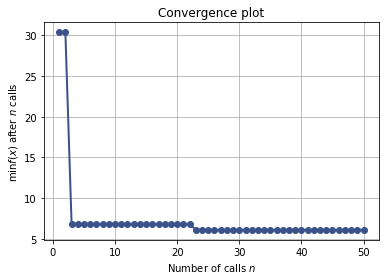

In [17]:
# Bayesian Optimization
num_thread = 20
params = ['learning_rate', 'gamma', 'max_depth', 'min_child_weight', 'reg_lambda', 'reg_alpha']

space = [(0.0001, 0.0009, 0.001, 0.009, 0.01, 0.09, 0.1, 0.9),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
         (2, 4, 6, 8, 10),
         (1,3,5,7,9),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
         (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2),
        ]

try:
    res_fm = forest_minimize(objective, space, n_calls=50,
                     random_state=60616,base_estimator= 'RF',acq_func='PI',
                     verbose=True, n_jobs=num_thread)
except ValueError:
    print('Forest diverged, random search intialized')
    res_fm = dummy_minimize(objective, space, n_calls=30,
         random_state=60616,
         verbose=True)

print('Minimum MSE found: {:6.5f}'.format(res_fm.fun))
print('Optimal parameters:')

for (p, x_) in zip(params, res_fm.x):
    print('{}: {}'.format(p, x_))

plot_convergence(res_fm);

### Regression using optimal parameters

In [76]:
reg = XGBRegressor(learning_rate=0.05, gamma=0.25, max_depth=4, min_child_weight=3,
                    reg_lambda=0.25, reg_alpha=1, random_state=60616)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [77]:
# For Training data
me.evaluate_model(y_pred_train,y_train)

			Model Performance

Mean Absolute Percentage Error: 0.04183446399697116

Mean Absolute Error: 0.20333663400063712

BIAS: 0.05076250050531149

Mean Squared Error: 0.3684868984299001

Root Mean Squared Error: 0.6070312170143313


In [78]:
# For testing data
me.evaluate_model(y_pred_test,y_test)

			Model Performance

Mean Absolute Percentage Error: 0.3395821316169734

Mean Absolute Error: 2.20126040571162

BIAS: 1.598365848441315

Mean Squared Error: 30.657280625562297

Root Mean Squared Error: 5.536901717166587


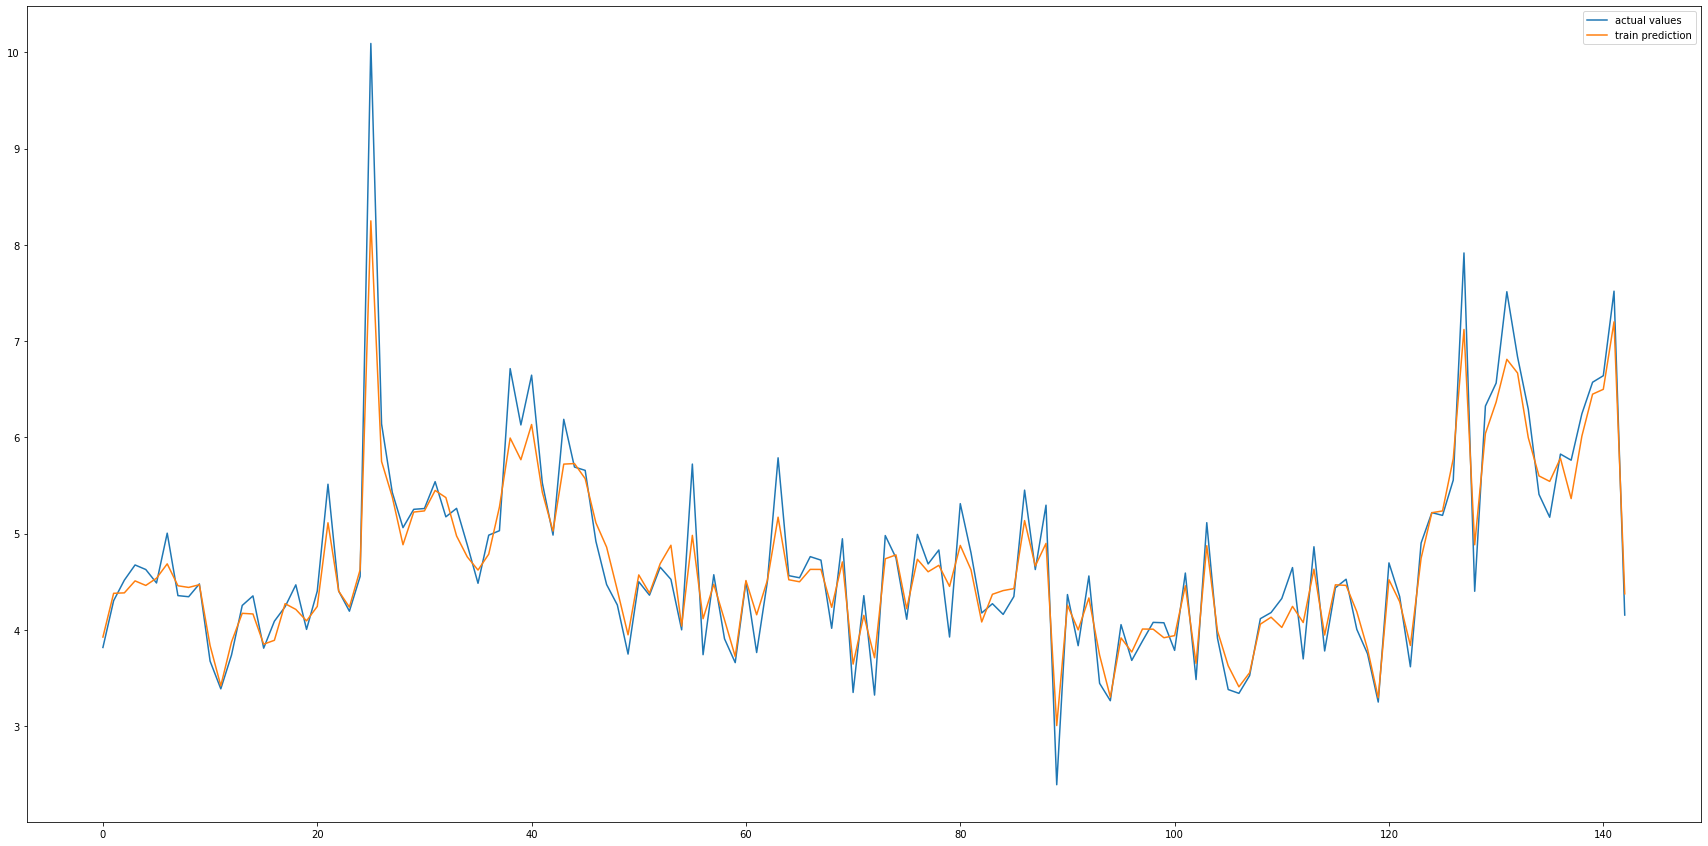

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=((30,15)))
plt.plot(target[0:143], label="actual values")
plt.plot(y_pred_train, label='train prediction')
plt.legend()
plt.show()

In [80]:
actual = np.array(y_test)
actual

array([3.9184229, 5.3092577, 6.4982704, 5.847473 , 7.0519424, 6.6491627,
       6.292482 , 4.5657951, 3.1856472, 9.8047636, 9.2290136, 2.9348693])

In [81]:
lists = [actual*100000, y_pred_test*100000]
df = pd.concat([pd.Series(x) for x in lists], axis=1)
df = df.rename(columns={0: 'Actual', 1: 'Predicted'})
df

,Actual,Predicted
0,391842.29,506290.388107
1,530925.77,529156.160355
2,649827.04,440827.035904
3,584747.30,468806.695938
4,705194.24,366569.733620
5,664916.27,387188.529968
6,629248.20,402089.977264
7,456579.51,434810.161591
8,318564.72,433513.212204
9,980476.36,394390.916824


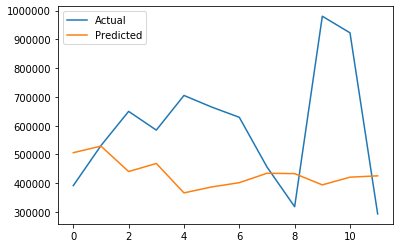

In [82]:
plt.plot(df.Actual, label='Actual')
plt.plot(df.Predicted, label='Predicted')
plt.legend()
plt.show()

In [83]:
lists = [np.array(year_month[-12:]), actual*100000, y_pred_test*100000]
df = pd.concat([pd.Series(x) for x in lists], axis=1)
df = df.rename(columns={0: 'Year_Month', 1: 'Actual', 2: 'Predicted'})
df

,Year_Month,Actual,Predicted
0,2019-12,391842.29,506290.388107
1,2020-01,530925.77,529156.160355
2,2020-02,649827.04,440827.035904
3,2020-03,584747.30,468806.695938
4,2020-04,705194.24,366569.733620
5,2020-05,664916.27,387188.529968
6,2020-06,629248.20,402089.977264
7,2020-07,456579.51,434810.161591
8,2020-08,318564.72,433513.212204
9,2020-09,980476.36,394390.916824
